In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bollywood = pd.read_csv('datasets/bollywood.csv')
bollywood

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


# Q1. Perform data exploration of Products, product categories, Customers, and Orders and describe the dataset.

In [5]:
bollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [6]:
bollywood.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


In [7]:
bollywood.isna().sum()

SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
dtype: int64

In [8]:
bollywood.duplicated().sum()

np.int64(0)

In [9]:
bollywood.nunique()

SlNo                   149
Release Date           102
MovieName              149
ReleaseTime              4
Genre                    7
Budget                  49
BoxOfficeCollection    118
YoutubeViews           149
YoutubeLikes           146
YoutubeDislikes        145
dtype: int64

In [10]:
bollywood['Genre'].unique()

array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

In [11]:
bollywood['Genre'] = bollywood['Genre'].str.strip()

In [12]:
bollywood['Release Date'] =pd.to_datetime(bollywood['Release Date'])
bollywood['Year'] = bollywood['Release Date'].dt.year
bollywood

/tmp/ipykernel_199027/3555426450.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bollywood['Release Date'] =pd.to_datetime(bollywood['Release Date'])


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,2014
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,2013
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,2014
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,2013
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,2014
...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2015
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464,1513,2015
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,2015
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,2015


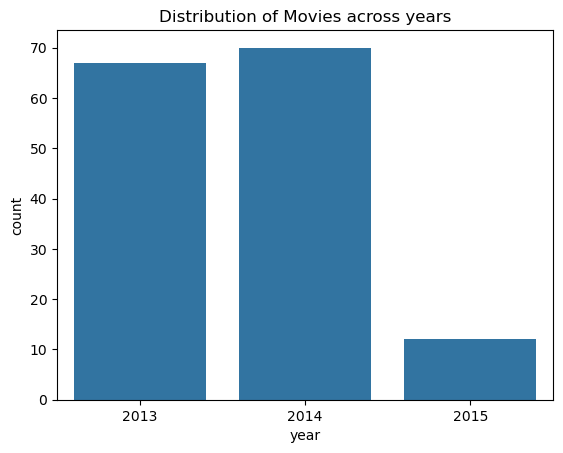

In [13]:
year_counts = bollywood['Year'].value_counts()
sns.barplot(x=year_counts.index,y=year_counts.values)
plt.title('Distribution of Movies across years')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

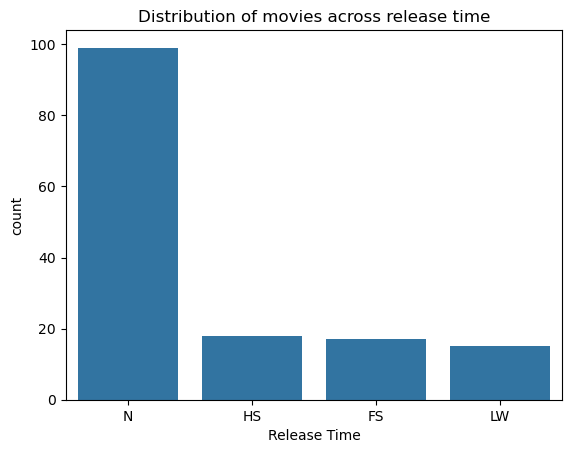

In [14]:
release_time_counts = bollywood['ReleaseTime'].value_counts()
sns.barplot(x=release_time_counts.index,y=release_time_counts.values)
plt.title('Distribution of movies across release time')
plt.xlabel('Release Time')
plt.ylabel('count')
plt.show()

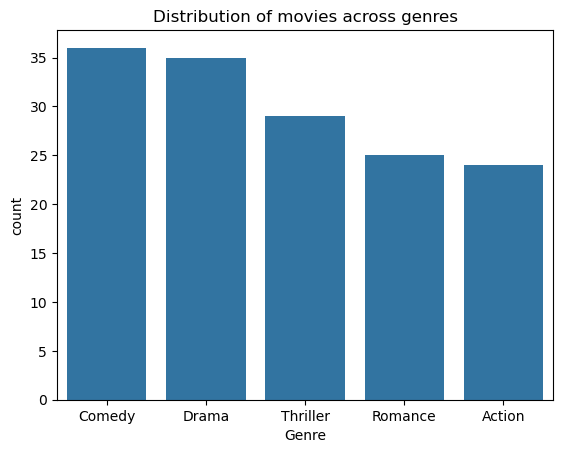

In [15]:
genre_counts = bollywood['Genre'].value_counts()
sns.barplot(x=genre_counts.index,y=genre_counts.values)
plt.title('Distribution of movies across genres')
plt.xlabel('Genre')
plt.ylabel('count')
plt.show()

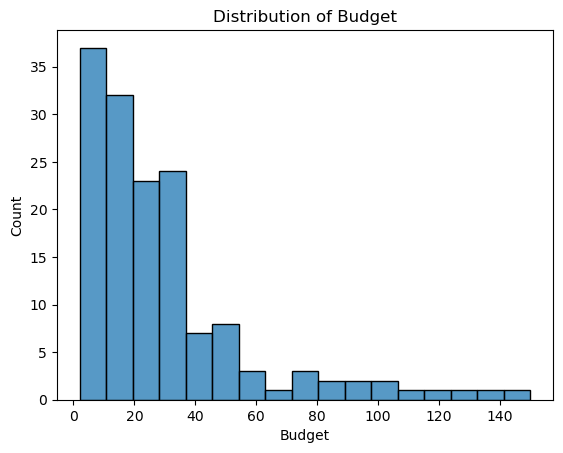

In [16]:
sns.histplot(bollywood['Budget'])
plt.title('Distribution of Budget')
plt.show()

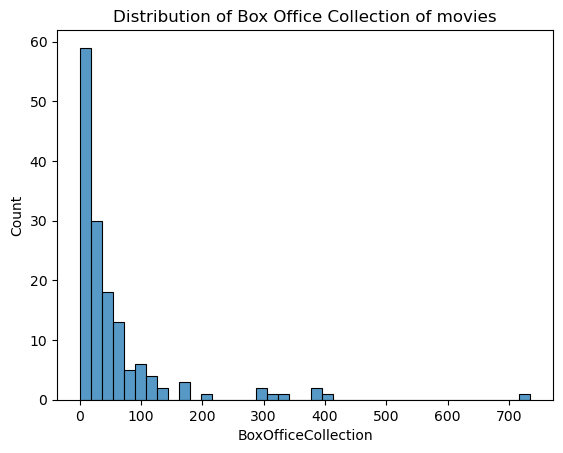

In [17]:
sns.histplot(bollywood['BoxOfficeCollection'])
plt.title('Distribution of Box Office Collection of movies')
plt.show()

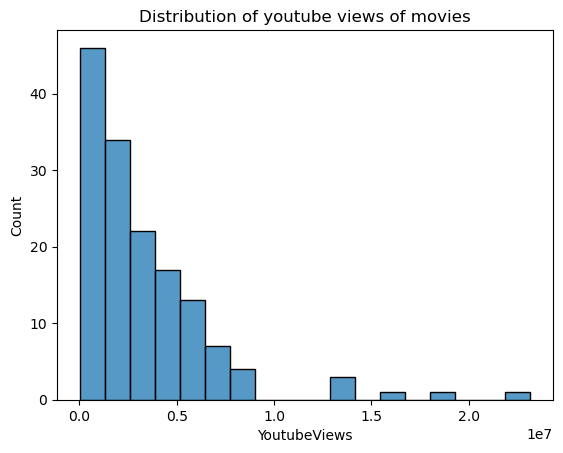

In [18]:
sns.histplot(bollywood['YoutubeViews'])
plt.title('Distribution of youtube views of movies')
plt.show()

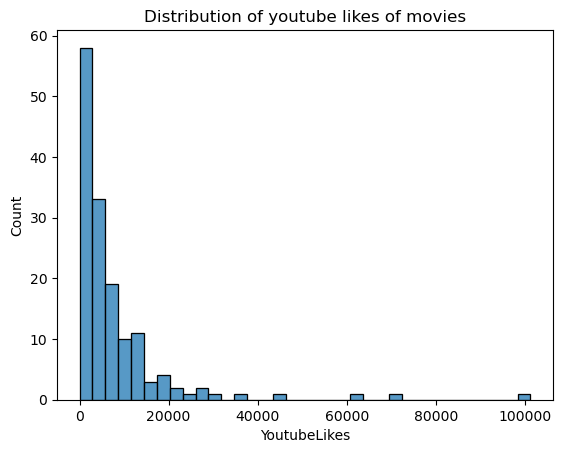

In [19]:
sns.histplot(bollywood['YoutubeLikes'])
plt.title('Distribution of youtube likes of movies')
plt.show()

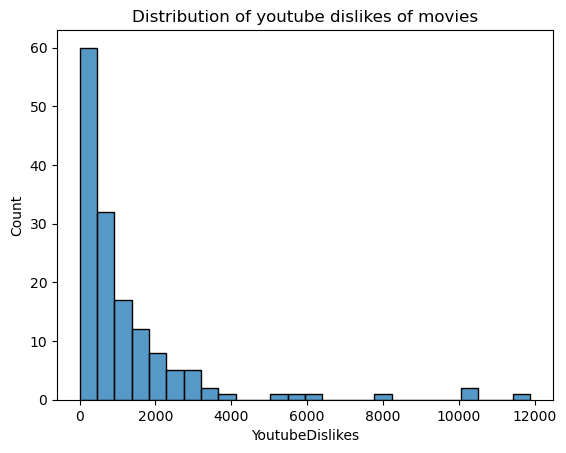

In [20]:
sns.histplot(bollywood['YoutubeDislikes'])
plt.title('Distribution of youtube dislikes of movies')
plt.show()

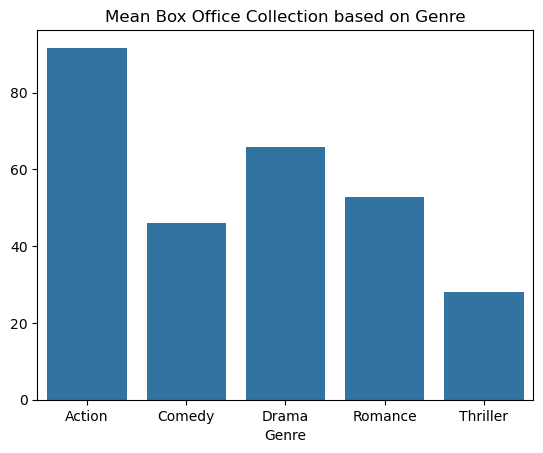

In [21]:
genre_boxoffice = bollywood.groupby('Genre')['BoxOfficeCollection'].mean()
sns.barplot(x=genre_boxoffice.index,y=genre_boxoffice.values)
plt.title('Mean Box Office Collection based on Genre')
plt.show()

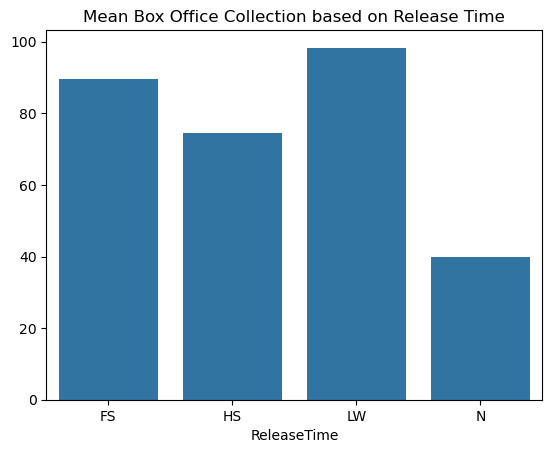

In [22]:
releasetime_boxoffice = bollywood.groupby('ReleaseTime')['BoxOfficeCollection'].mean()
sns.barplot(x=releasetime_boxoffice.index,y=releasetime_boxoffice.values)
plt.title('Mean Box Office Collection based on Release Time')
plt.show()

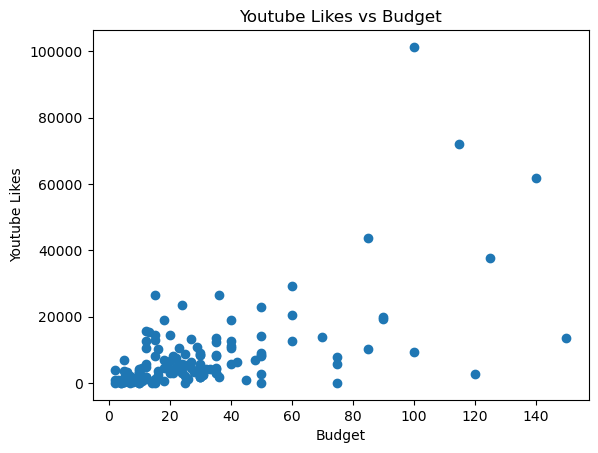

In [23]:
plt.scatter(bollywood['Budget'],bollywood['YoutubeLikes'])
plt.title('Youtube Likes vs Budget')
plt.xlabel('Budget')
plt.ylabel('Youtube Likes')
plt.show()

# Q2 Perform the required data cleaning for missing or inconsistent data.

The dataset does not have any missing data but it has inconsistent data in the form of some rows having youtube likes and dislikes as 1 even tho the video has a lot of views. I changed those values to the mean of the column.

In [26]:
bollywood['YoutubeLikes'] = bollywood['YoutubeLikes'].replace(1,bollywood['YoutubeLikes'].mean())
bollywood['YoutubeDislikes'] = bollywood['YoutubeDislikes'].replace(1,bollywood['YoutubeDislikes'].mean())
bollywood

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622.0,2527.0,2014
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129.0,137.0,2013
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586.0,54.0,2014
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86.0,19.0,2013
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512.0,1224.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
144,145,2015-02-27,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185.0,615.0,2015
145,146,2015-03-13,NH10,N,Thriller,13,32.10,5592977,15464.0,1513.0,2015
146,147,2015-03-20,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289.0,807.0,2015
147,148,2015-03-20,Hunterrr,N,Comedy,5,11.89,4674795,3706.0,762.0,2015


# Q3 3. Use Python and libraries like Pandas, Matplotlib and Seaborn to create insightful tabulations and visualization for the following

### Movies & Genres : Example Insights: How many movies got released in each genre? Which genre had highest number of releases? How many movies in each genre got released in different release times ?

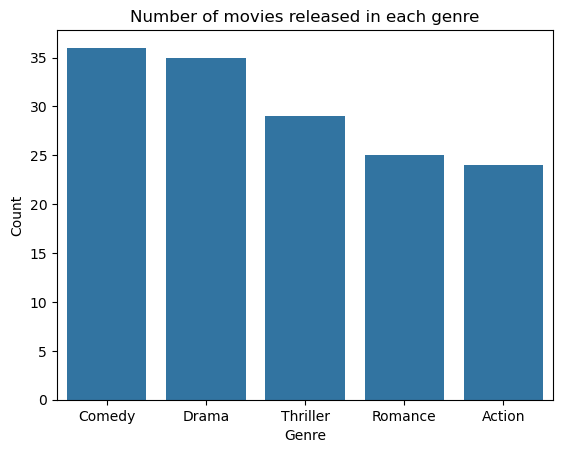

Genre
Action      24
Comedy      36
Drama       35
Romance     25
Thriller    29
dtype: int64

In [30]:
genre_count = bollywood.groupby('Genre').size()
sns.barplot(x = genre_counts.index,y = genre_counts.values)
plt.title('Number of movies released in each genre')
plt.ylabel('Count')
plt.show()
genre_count

In [35]:
print('Genre with highest number of releases: ',genre_count.idxmax())

Genre with highest number of releases:  Comedy


In [40]:
genre_release_count = bollywood.groupby(['ReleaseTime','Genre']).size()
print('Number of movies in each genre released at different release times')
genre_release_count

Number of movies in each genre released at different release times


ReleaseTime  Genre   
FS           Action       3
             Comedy       3
             Drama        4
             Romance      3
             Thriller     4
HS           Action       3
             Comedy       5
             Drama        6
             Romance      3
             Thriller     1
LW           Action       3
             Comedy       5
             Drama        1
             Romance      4
             Thriller     2
N            Action      15
             Comedy      23
             Drama       24
             Romance     15
             Thriller    22
dtype: int64

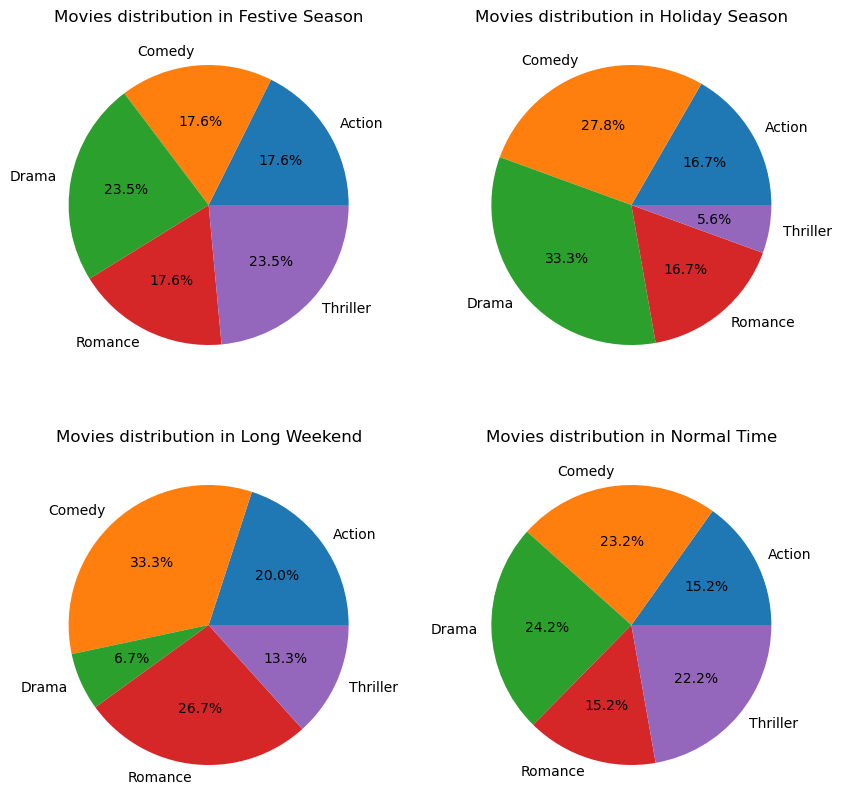

In [52]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].pie(genre_release_count.FS.values,labels = genre_release_count.FS.index,autopct='%1.1f%%')
ax[0,0].title.set_text('Movies distribution in Festive Season')
ax[0,1].pie(genre_release_count.HS.values,labels = genre_release_count.HS.index,autopct='%1.1f%%')
ax[0,1].title.set_text('Movies distribution in Holiday Season')
ax[1,0].pie(genre_release_count.LW.values,labels = genre_release_count.LW.index,autopct='%1.1f%%')
ax[1,0].title.set_text('Movies distribution in Long Weekend')
ax[1,1].pie(genre_release_count.N.values,labels = genre_release_count.N.index,autopct='%1.1f%%')
ax[1,1].title.set_text('Movies distribution in Normal Time')
plt.show()